In [3]:
import pandas as pd
import numpy as np

In [4]:
from keras.models import load_model
MOMENT_model=load_model('3-spanMOM-noLPF-model.h5')
ROTATION_model=load_model('3-spanROT-noLPF-model.h5')

In [6]:
#GET REAL RESULTS FOR THE 3 SCENARIOS

ROT_orig =  pd.read_excel('3-span-7-6-3-ROT.xlsx')
MOM_orig =  pd.read_excel('3-span-7-6-3-MOM.xlsx')

rot=[]
mom=[]


load=[]
load2=[]
load3=[]
LPF=[]

for i in range(0,20):
    rot.append(ROT_orig.iloc[i][[8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68]])
    mom.append(MOM_orig.iloc[i][[8,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88,91,94,97]])
    
    load.append(int(ROT_orig.iloc[i][0]))
    load2.append(int(ROT_orig.iloc[i][1]))
    load3.append(int(ROT_orig.iloc[i][2]))
    LPF.append(float(ROT_orig.iloc[i][3]))

###########################################################################################################
    


#GET NN PREDICTIONS FOR THE 3 SCENARIOS

inp = np.zeros((21,7,1))

for i in range(20):
    
    inp[i,0,0] = (load[i])*0.01
    inp[i,1,0] = (load2[i])*0.01
    inp[i,2,0] = (load3[i])*0.01
    
    inp[i,3,0] = 7
    inp[i,4,0] = 6
    inp[i,5,0] = 3
    
    inp[i,6,0] = 1
                 
    

Inc_MOMENT = MOMENT_model.predict([inp[:,:,0]])

Inc_ROTATION = ROTATION_model.predict([inp[:,:,0]])


In [7]:

import time
begin=time.time()
Inc_MOMENT = MOMENT_model.predict([inp[:,:,0]])
end=time.time()
print(end-begin)

0.0019948482513427734


In [8]:
#GET BOTH REAL RESULTS AND NN PREDICTION FOR THE MOMENT AND ROTATION IN THE ROTULA POINTS

Numero_iteracoes=20

momento_10=[]
rotacao_10=[]
momento_15=[]
rotacao_15=[]
momento_20=[]
rotacao_20=[]

momento_10_orig=[]
rotacao_10_orig=[]
momento_15_orig=[]
rotacao_15_orig=[]
momento_20_orig=[]
rotacao_20_orig=[]

for i in range(0,20):
   
    momento_10.append(Inc_MOMENT[i][10])
    rotacao_10.append(Inc_ROTATION[i][10])

    momento_15.append(Inc_MOMENT[i][15])
    rotacao_15.append(Inc_ROTATION[i][15])

    momento_20.append(Inc_MOMENT[i][20])
    rotacao_20.append(Inc_ROTATION[i][20])

for i in range(0,20):
    
    momento_10_orig.append(mom[i][10])
    rotacao_10_orig.append(rot[i][10])

    momento_15_orig.append(mom[i][15])
    rotacao_15_orig.append(rot[i][15])

    momento_20_orig.append(mom[i][20])
    rotacao_20_orig.append(rot[i][20])
    


In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def make_graph_MxR(rotacao,momento,rotacao_orig, momento_orig,_load,title):

    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')


    plt.plot(rotacao,momento,label='NN') 
    plt.plot(rotacao_orig,momento_orig,label='Original')
    plt.legend()
    plt.grid()
    
    plt.xlabel('rotation')
    plt.ylabel('moment')
    plt.title(title)
    stepd=(max(max(momento),max(momento_orig)) - min(min(momento),min(momento_orig)))/10.0
    plt.yticks(np.arange(min(min(momento),min(momento_orig)), max(max(momento),max(momento_orig))+stepd ,step=stepd))

    stepd=(max(max(rotacao),max(rotacao_orig)) - min(min(rotacao),min(rotacao_orig)))/10.0
    plt.xticks(np.arange(min(min(rotacao),min(rotacao_orig)), max(max(rotacao),max(rotacao_orig))+stepd ,step=stepd))


    for i in range(0,20):
        plt.annotate(int(_load[i]*LPF[i]), # this is the text
                 (rotacao[i],momento[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='blue')
        plt.annotate(int(_load[i]*LPF[i]), # this is the text
                 (rotacao_orig[i],momento_orig[i]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='red')

In [10]:
print(load)
print(LPF)


[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]
[9.51781272888, 9.51781272888, 9.46210098267, 8.89941310883, 8.17862796783, 6.91933345795, 6.01364517212, 5.33374023438, 4.80055522919, 4.37232685089, 3.9785528183, 3.64700675011, 3.36646771431, 3.12600588799, 2.91760540009, 2.73525500298, 2.57435774803, 2.4313378334, 2.30337262154, 2.18820405006]


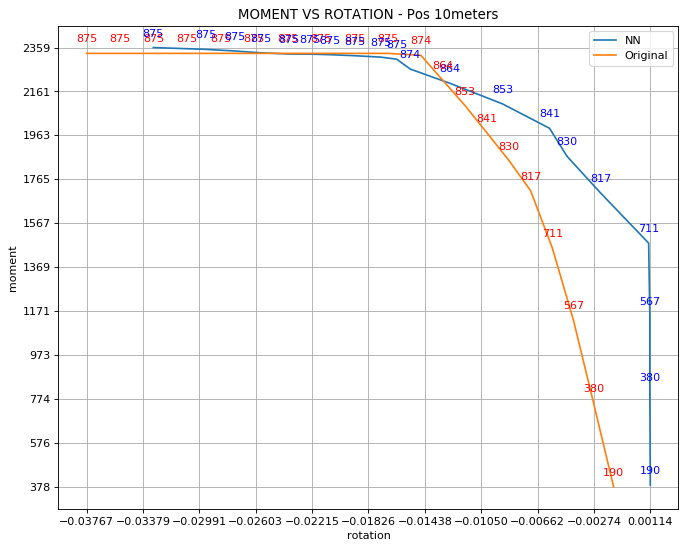

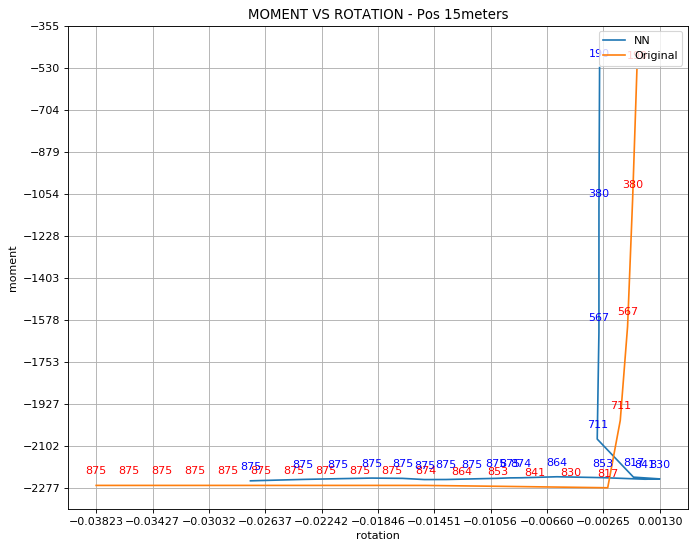

In [11]:
make_graph_MxR(rotacao_10,momento_10,rotacao_10_orig,momento_10_orig,load,'MOMENT VS ROTATION - Pos 10meters')
make_graph_MxR(rotacao_15,momento_15,rotacao_15_orig,momento_15_orig,load,'MOMENT VS ROTATION - Pos 15meters')

In [12]:
print(momento_10)
print(rotacao_10)

[385.97617, 804.94037, 1147.161, 1477.2822, 1702.9858, 1868.8169, 1995.0416, 2104.959, 2197.2715, 2262.0042, 2306.726, 2315.9521, 2322.3035, 2326.8828, 2329.3835, 2329.911, 2335.3438, 2343.5469, 2350.838, 2359.0908]
[0.0011442606, 0.0011140243, 0.001112653, 0.0010308893, -0.0022769268, -0.0045915367, -0.005797172, -0.00903286, -0.012629308, -0.015386157, -0.01632184, -0.017428122, -0.019223573, -0.020908304, -0.022302648, -0.02372392, -0.025673574, -0.0274716, -0.029455798, -0.03308233]


In [13]:
#PLOT THEM NEXT TO EACH OTHER
def make_graph(_xx,_var,sk,_load,_title):
    figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
    maxes=[]
    mins=[]
    for i in range(0,20):
        maxes.append(max(max(_var[i]),max(sk[i])))
        mins.append(min(min(_var[i]),min(sk[i])))
        plt.plot(_xx,_var[i],'r',label=str(_load[i])+'N-NN') 
        plt.plot(_xx,sk[i],'b',label=str(_load[i])+'N-Original')

    
    stepd=(max(maxes)-min(mins))/20.0
    plt.yticks(np.arange(min(mins), max(maxes)+stepd ,step=stepd))
    plt.xticks(xticks)
    plt.grid(True)
    
    plt.title(_title,fontsize=20)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.close()
    
    
    err =err = np.sum(np.abs((_var-sk)/sk*100)/12,axis=0)
    print('Posição \t Erro Relativo Médio')
    for i in range(13):
        print(str(i)+" metros \t"+str(err[i].round(2))+'%')
    
###########################################

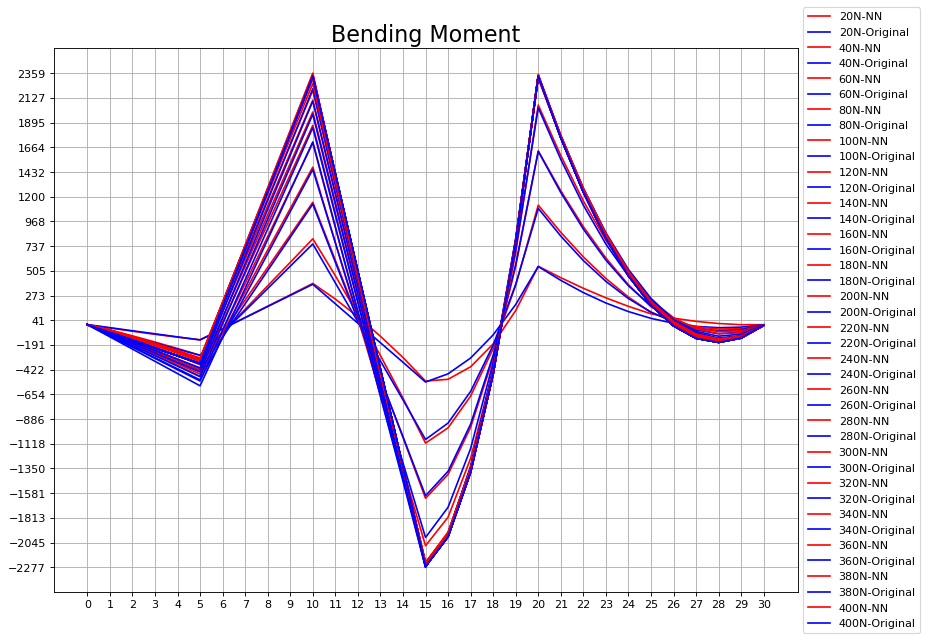

ValueError: operands could not be broadcast together with shapes (21,31) (20,31) 

In [14]:
xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
make_graph(xticks,Inc_MOMENT,mom,load,'Bending Moment')